# About Today's Practice:

1. Content-Related: **Supervised ML Models: Logistic Regression!**
\
&nbsp;
2. Advertisement Clicks: When someone clicks your ad, like on the blue headline or phone number of a text ad, Google Ads counts that as a click. A click is counted even if the person doesn't reach your website, maybe because it's temporarily unavailable. **The importance of advertising in business derives from the possibility to drive business growth.** Advertising works to amplify your small business marketing efforts and helps you reach the right audience with positive, targeted messaging that converts potential customers into paying customers.
\
&nbsp;
3. Logistic Regression: It is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique category. It is **used for predicting the categorical dependent variable using a given set of independent variables.** Logistic regression predicts the output of a categorical dependent variable.
\
&nbsp;
4. Dataset: This data set contains the following features:`Daily Time Spent on Site`: consumer time on site in minutes, `Age`: cutomer age in years, `Area Income`: Avg. Income of geographical area of consumer, `Daily Internet Usage`: Avg. minutes a day consumer is on the internet, `Ad Topic Line`: Headline of the advertisement, `City`: City of consumer, `Male`: Whether or not consumer was male, `Country`: Country of consumer, `Timestamp`: Time at which consumer clicked on Ad or closed window, `Clicked on Ad`: 0 or 1 indicated clicking on Ad.
\
&nbsp;

# Set-up 

In [56]:
# Commonly used libraries
import pandas as pd
import numpy as np

# From ScikitLearn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# Data Exploration & Preprocessing

In [58]:
# loading dataset and chekcing its heads!
df = pd.read_csv("advertising.csv")

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [60]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Text(0.5, 0, 'Age')

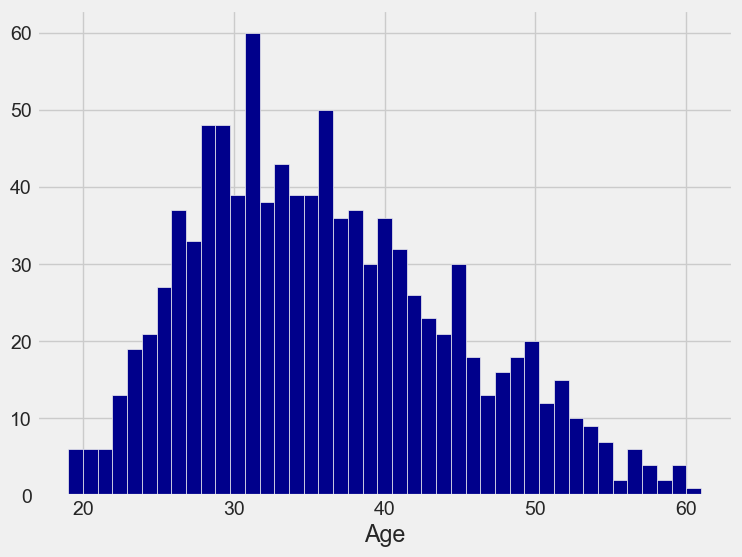

In [61]:
# To plot histograms -- In this case we are checking the histogram of the "age"
plt.figure(figsize=(8, 6))
df.Age.hist(bins=df.Age.nunique(), color = "darkblue")
plt.xlabel('Age')

<Figure size 800x600 with 0 Axes>

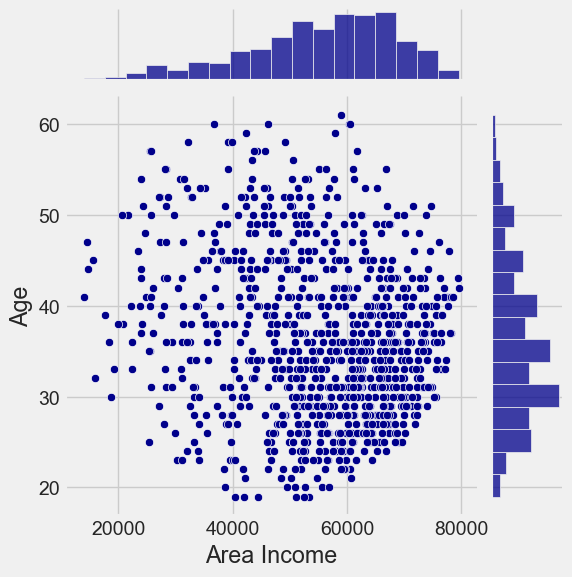

In [62]:
# Here we are checking the "age" per "area income"
plt.figure(figsize=(8, 6))
sns.jointplot(x=df['Area Income'], y=df.Age, color="darkblue")


<Figure size 800x600 with 0 Axes>

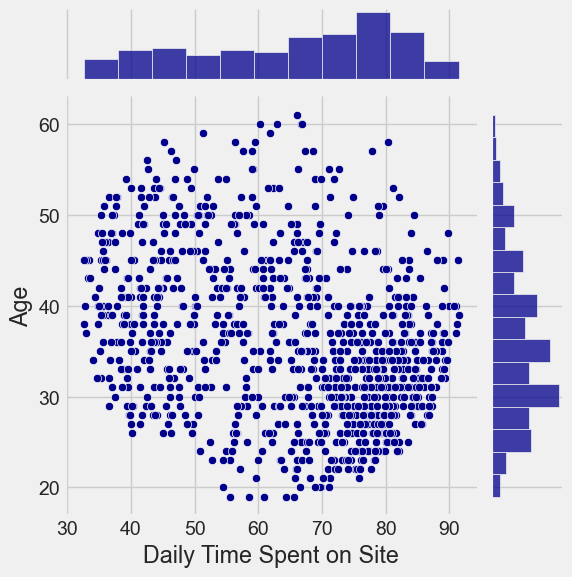

In [63]:
# Here we are checking the "age" per "daily time spent on site"
plt.figure(figsize=(8, 6))
sns.jointplot(x=df["Daily Time Spent on Site"], y=df.Age, color = "darkblue")

<Figure size 800x600 with 0 Axes>

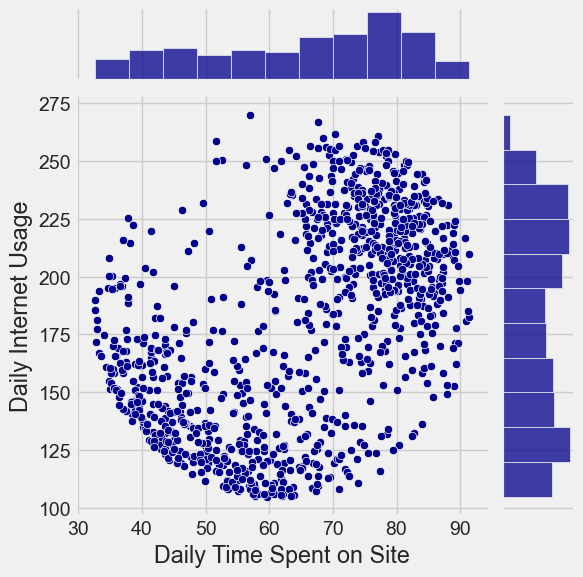

In [64]:
# Here we are checking the "daily internet usage" per "daily time spent on site"
plt.figure(figsize=(8, 6))
sns.jointplot(x=df["Daily Time Spent on Site"], y=df["Daily Internet Usage"], color = "darkblue")

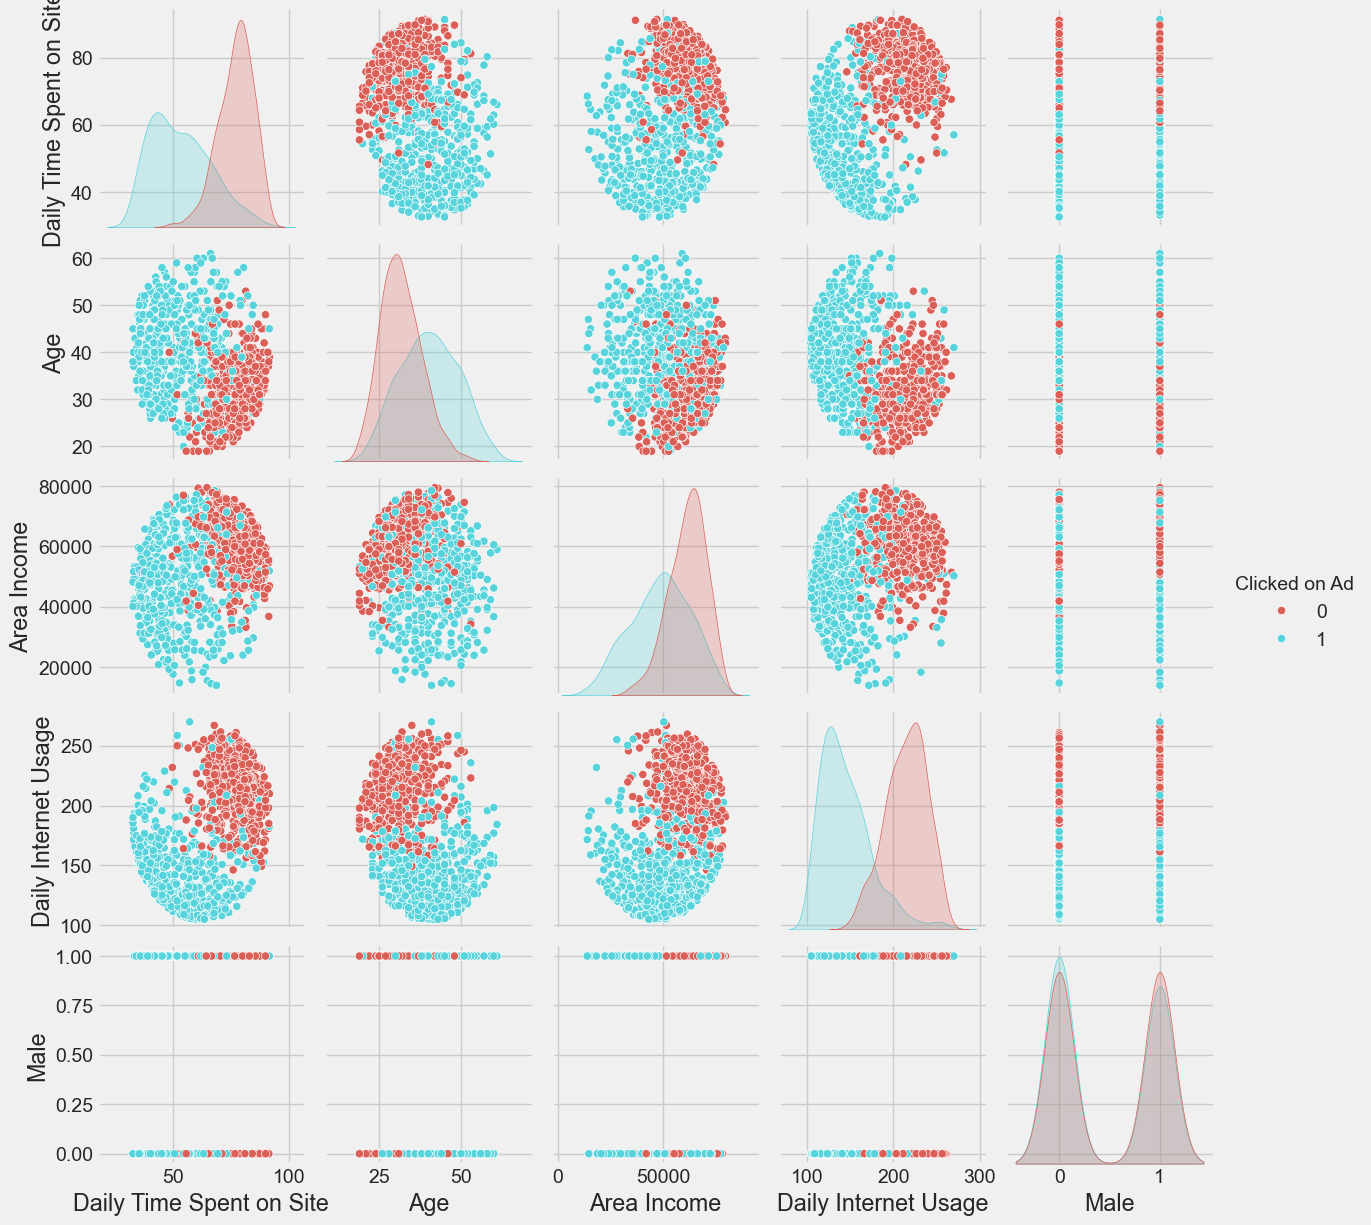

In [65]:
# Here we have all pairwise plots -- highlighting the "clicked on ad" feature!
sns.pairplot(df, hue='Clicked on Ad', palette='hls')

In [66]:
# The "clicked on ad" observations distribution
df['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

<Axes: >

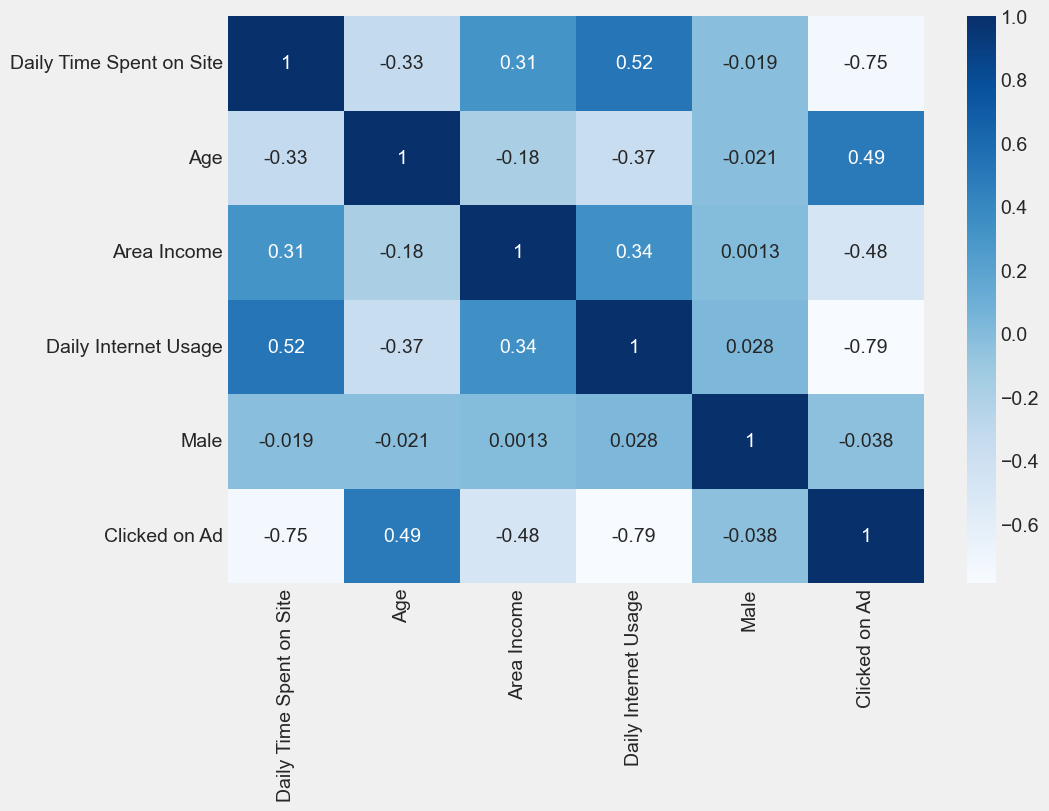

In [67]:
# Correlation among all features
plt.figure(figsize=(10, 7))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="Blues")


In [68]:
# Here we are creating a funciton to make the visualization of the results (metrics of validation) better

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [69]:
# Here we are dropping features with low variance and defining the dependent variable
# We also prepare data to be used as input in the ML models (e.g., scaling)

X = df.drop(['Timestamp', 'Clicked on Ad', 'Ad Topic Line', 'Country', 'City'], axis=1)
y = df['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# If we had any categorical feature we would use the belo line with the features too!
# cat_columns = []
num_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']

ct = make_column_transformer(
    (MinMaxScaler(), num_columns),
    (StandardScaler(), num_columns),
    remainder='passthrough'
)

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

# Model Implementation

In [71]:
# Model Implementation
from sklearn.linear_model import LogisticRegression

# Model initialization
lr_clf = LogisticRegression(solver='liblinear')

# Model fitting (now includes both X and y)
lr_clf.fit(X_train, y_train)

# Scoring
print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 97.43%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.964088    0.985207  0.974286    0.974648      0.974527
recall       0.985876    0.962428  0.974286    0.974152      0.974286
f1-score     0.974860    0.973684  0.974286    0.974272      0.974279
support    354.000000  346.000000  0.974286  700.000000    700.000000
_______________________________________________
Confusion Matrix: 
 [[349   5]
 [ 13 333]]

Test Result:
Accuracy Score: 97.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.959732    0.980132      0.97    0.969932      0.970204
recall       0.979452    0.961039      0.97    0.970246      0.970000
f1-score     0.969492    0.970492      0.97    0.969992      0.970005
support    146.000000  154.000000      0.97  300.000000    300.

In [72]:
# We can also use other classifiers. Below we use RF!

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1000)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    354.0  346.0       1.0      700.0         700.0
_______________________________________________
Confusion Matrix: 
 [[354   0]
 [  0 346]]

Test Result:
Accuracy Score: 95.67%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.946309    0.966887  0.956667    0.956598      0.956872
recall       0.965753    0.948052  0.956667    0.956903      0.956667
f1-score     0.955932    0.957377  0.956667    0.956655      0.956674
support    146.000000  154.000000  0.956667  300.000000    300.000000
_______________________________________________

# About the Metrics of Validation

### 1. Confusion Matrix
- Each row: actual class
- Each column: predicted class

First row: Non-clicked Ads, the negative class:
* 143 were correctly classified as Non-clicked Ads. **True negatives**. 
* Remaining 6 were wrongly classified as clicked Ads. **False positive**


Second row: The clicked Ads, the positive class:
* 3 were incorrectly classified as Non-clicked Ads. **False negatives**
* 146 were correctly classified clicked Ads. **True positives**

### 2. Precision

Precision measures the accuracy of positive predictions. Also called the precision of the classifier.

$$\textrm{precision} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Positives}}$$

### 3. Recall

Precision is typically used with recall (Sensitivity or True Positive Rate). The ratio of positive instances that are correctly detected by the classifier.

$$\textrm{recall} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Negatives}}$$ 

### 4. F1 Score

$F_1$ score is precision + recall harmonic mean. Regular mean weights all values equally. Harmonic mean favors low values.


$$F_1=\frac{2}{\frac{1}{\textrm{precision}}+\frac{1}{\textrm{recall}}}=2\times \frac{\textrm{precision}\times \textrm{recall}}{\textrm{precision}+ \textrm{recall}}=\frac{TP}{TP+\frac{FN+FP}{2}}$$ 

The $F_1$ score favours classifiers that have similar precision and recall.


### 5. AUC/ROC Curve

Instead of accuracy vs recall, the ROC curve shows recall (true positive rate) against false positive rate. The FPR is the percentage of negative cases misclassified as positive. It is equal to one minus the true negative rate, which is the ratio of negative instances that are correctly classified as negative.

Specificity is the TNR. The ROC curve displays sensitivity (recall) versus 1-specificity.


#### Ps. Use PR curve whenever the **positive class is rare** or when you care more about the false positives than the false negatives. Use ROC curve whenever the **negative class is rare** or when you care more about the false negatives than the false positives.

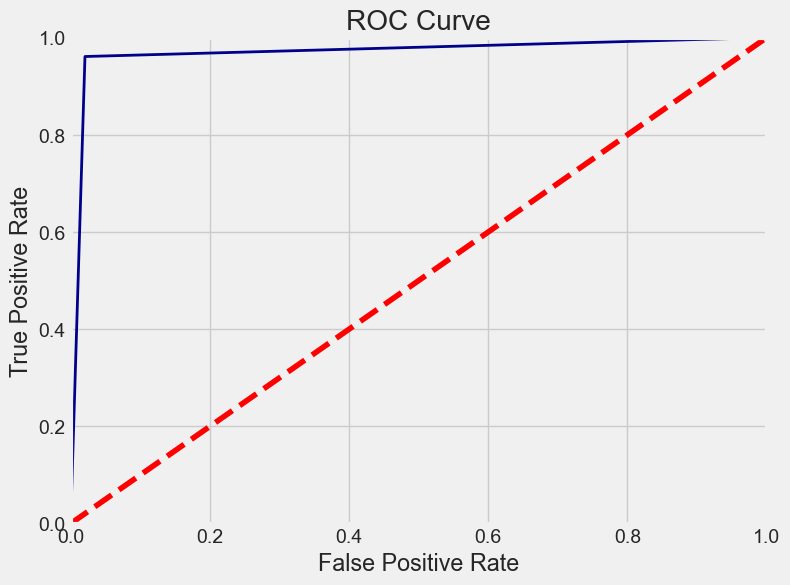

In [75]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label, color="darkblue")
    plt.plot([0, 1], [0, 1], "--", color="red")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")

# Calculate ROC components
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test))

# Plot
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()


In [76]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, lr_clf.predict(X_test))

0.9702455079167409

# Hyperparameter tuning: Logistic Regression

In [78]:
# We will use grid search to test different hyperparameters for our LR model

from sklearn.model_selection import GridSearchCV

lr_clf = LogisticRegression()

# Different penalties, weights, solver methods
penalty = ['l1', 'l2']
C = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(
    penalty=penalty, 
    C=C, 
    class_weight=class_weight, 
    solver=solver
)

# using 10-Fold cross validaiton, and parallelizing, also extracting F-1 in each case
lr_cv = GridSearchCV(
    estimator=lr_clf, 
    param_grid=param_grid, 
    scoring='f1',
    verbose=1, 
    n_jobs=-1, 
    cv=10
)

lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")

lr_clf = LogisticRegression(**best_params)
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
Best parameters: {'C': 0.4, 'class_weight': {1: 0.6, 0: 0.4}, 'penalty': 'l2', 'solver': 'liblinear'}
Train Result:
Accuracy Score: 97.14%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.961326    0.982249  0.971429    0.971787      0.971668
recall       0.983051    0.959538  0.971429    0.971294      0.971429
f1-score     0.972067    0.970760  0.971429    0.971414      0.971421
support    354.000000  346.000000  0.971429  700.000000    700.000000
_______________________________________________
Confusion Matrix: 
 [[348   6]
 [ 14 332]]

Test Result:
Accuracy Score: 96.67%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.959459    0.973684  0.966667    0.966572      0.966761
recall       0.972603    0.961039  0.9

## References:

- [Scikit Learn Library](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)
- [Logistic Regression for Machine Learning by Jason Brownlee PhD](https://machinelearningmastery.com/logistic-regression-for-machine-learning/)
- [Logistic Regression by Fares Sayah](https://www.kaggle.com/code/faressayah/logistic-regression-for-binary-classification-task)